<a href="https://colab.research.google.com/github/nfilipas/handson-ml3/blob/main/exercises/chapter9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 10

In [3]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import numpy as np

In [4]:
olivetti = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [5]:
X, y = olivetti.data, olivetti.target
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=40, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=40, stratify=y_train_val)

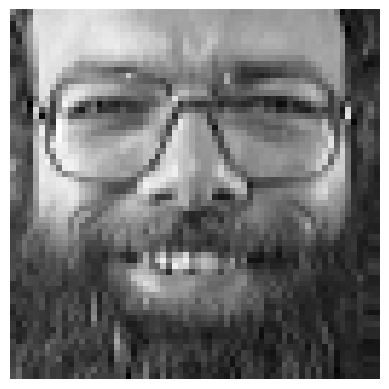

In [6]:
plt.imshow(X_train[0].reshape((64,64)), cmap="gray")
plt.axis("off")
plt.show()

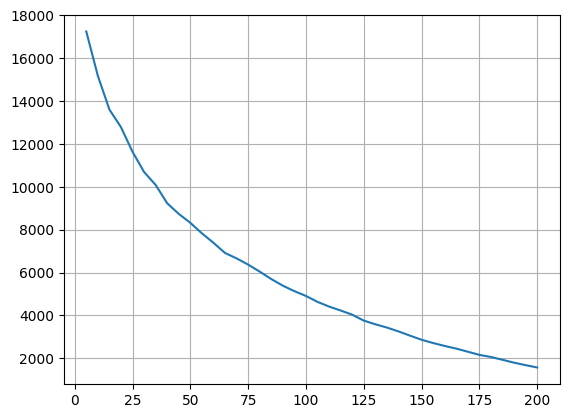

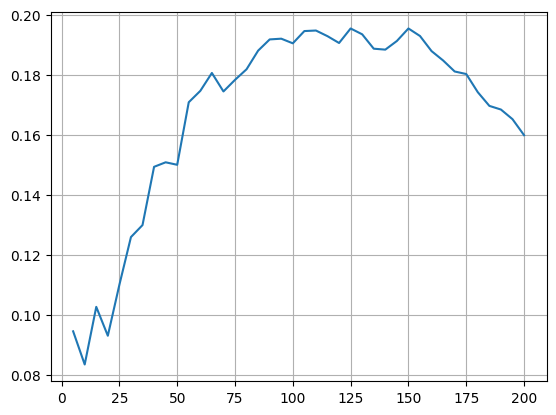

In [7]:
n_clusters_max = 200
n_clusters_range = range(5, n_clusters_max + 1, 5)
inertia_list = []
silhouette_list = []
for n_clusters in n_clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, n_init="auto", random_state=42)
    kmeans.fit(X_train)
    inertia_list.append(kmeans.inertia_)
    silhouette_list.append(silhouette_score(X_train, kmeans.labels_))

plt.plot(n_clusters_range, inertia_list)
plt.grid(True)
plt.show()

plt.plot(n_clusters_range, silhouette_list)
plt.grid(True)
plt.show()

In [8]:
n_clusters_best_index = np.argmax(silhouette_list)
print(f"Number of clusters with best silhouette score: {list(n_clusters_range)[n_clusters_best_index]}")

Number of clusters with best silhouette score: 150


In [9]:
kmeans = KMeans(n_clusters=120, n_init="auto", random_state=42)
kmeans.fit(X_train)

KMeans(n_clusters=120, n_init='auto', random_state=42)

In [10]:
X_train_cluster_i = X_train[kmeans.labels_ == 4]
print(X_train_cluster_i)

[[0.45454547 0.42975205 0.5371901  ... 0.4090909  0.38429752 0.38429752]
 [0.5247934  0.49173555 0.5371901  ... 0.36363637 0.3140496  0.3677686 ]]


Cluster 1:


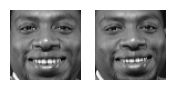


Cluster 2:


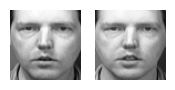


Cluster 3:


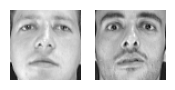


Cluster 4:


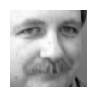


Cluster 5:


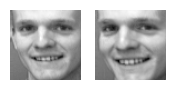


Cluster 6:


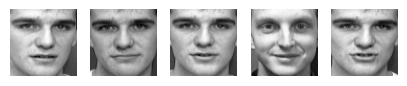


Cluster 7:


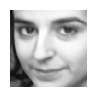


Cluster 8:


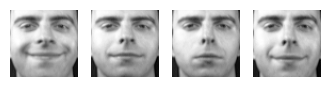


Cluster 9:


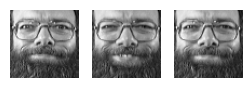


Cluster 10:


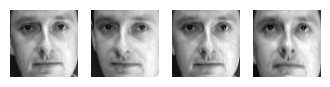

In [11]:
n_labels_max = 10
for n_labels in range(n_labels_max):
    print(f"Cluster {n_labels + 1}:")
    X_train_cluster_i = X_train[kmeans.labels_ == n_labels]
    n_images = X_train_cluster_i.shape[0]
    fig, axes = plt.subplots(1, n_images, figsize=(n_images, 1))
    axes = np.atleast_1d(axes)
    for i in range(X_train_cluster_i.shape[0]):
        axes[i].imshow(X_train_cluster_i[i].reshape((64, 64)), cmap="gray")
        axes[i].axis("off")
    plt.show()
    print()

# Exercise 11

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [18]:
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [19]:
rf_clf.score(X_val, y_val)

0.8

In [28]:
n_clusters_list = list(range(5, 201, 5))

for n_clusters in n_clusters_list:
    pipeline = make_pipeline(
        KMeans(n_clusters=n_clusters, n_init="auto", random_state=42),
        RandomForestClassifier(random_state=42))

    pipeline.fit(X_train, y_train)
    print(f"Number of clusters: {n_clusters}, accuracy: {pipeline.score(X_val, y_val)}")

Number of clusters: 5, accuracy: 0.525
Number of clusters: 10, accuracy: 0.625
Number of clusters: 15, accuracy: 0.725
Number of clusters: 20, accuracy: 0.625
Number of clusters: 25, accuracy: 0.75
Number of clusters: 30, accuracy: 0.75
Number of clusters: 35, accuracy: 0.75
Number of clusters: 40, accuracy: 0.775
Number of clusters: 45, accuracy: 0.85
Number of clusters: 50, accuracy: 0.8
Number of clusters: 55, accuracy: 0.775
Number of clusters: 60, accuracy: 0.75
Number of clusters: 65, accuracy: 0.725
Number of clusters: 70, accuracy: 0.75
Number of clusters: 75, accuracy: 0.75
Number of clusters: 80, accuracy: 0.775
Number of clusters: 85, accuracy: 0.85
Number of clusters: 90, accuracy: 0.8
Number of clusters: 95, accuracy: 0.775
Number of clusters: 100, accuracy: 0.7
Number of clusters: 105, accuracy: 0.8
Number of clusters: 110, accuracy: 0.825
Number of clusters: 115, accuracy: 0.8
Number of clusters: 120, accuracy: 0.775
Number of clusters: 125, accuracy: 0.825
Number of clu

In [27]:
grid_search.best_params_

{'kmeans__n_clusters': 190}